# 카카오톡 대화분석
## 대화내용 정제하기

#### 주의 : 카카오톡의 대화 내용은 굉장히 private하므로 데이터 보안에 주의하여야 한다. 

### 0. PC카카오톡에서 대화 내용 가져오기

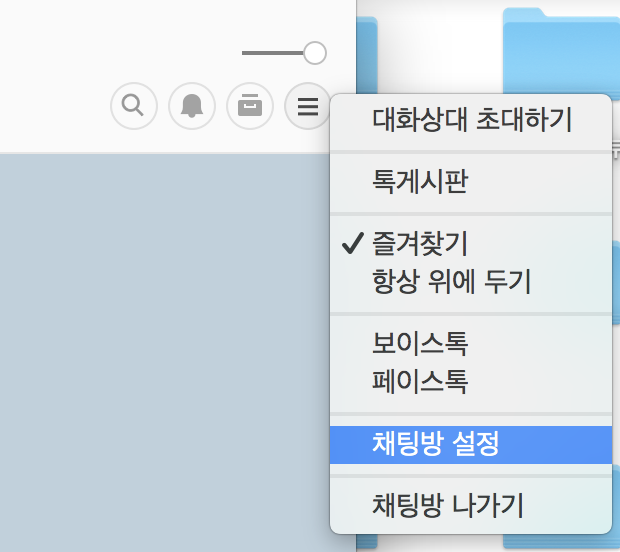
![1.%20%E1%84%8B%E1%85%B5%E1%84%85%E1%85%A5%E1%87%82%E1%84%80%E1%85%A6%20%E1%84%83%E1%85%A2%E1%84%92%E1%85%AA%E1%84%82%E1%85%A2%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%8B%E1%85%B3%E1%86%AF%20%E1%84%8C%E1%85%A5%E1%84%8C%E1%85%A1%E1%86%BC%E1%84%92%E1%85%A1%E1%84%86%E1%85%A7%E1%86%AB%20csv%20%E1%84%91%E1%85%A1%E1%84%8B%E1%85%B5%E1%86%AF%E1%84%85%E1%85%A9%20%E1%84%87%E1%85%A1%E1%86%AE%E1%84%8B%E1%85%A1%E1%84%8C%E1%85%B5%E1%86%AB%E1%84%83%E1%85%A1.%20.png](attachment:1.%20%E1%84%8B%E1%85%B5%E1%84%85%E1%85%A5%E1%87%82%E1%84%80%E1%85%A6%20%E1%84%83%E1%85%A2%E1%84%92%E1%85%AA%E1%84%82%E1%85%A2%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%8B%E1%85%B3%E1%86%AF%20%E1%84%8C%E1%85%A5%E1%84%8C%E1%85%A1%E1%86%BC%E1%84%92%E1%85%A1%E1%84%86%E1%85%A7%E1%86%AB%20csv%20%E1%84%91%E1%85%A1%E1%84%8B%E1%85%B5%E1%86%AF%E1%84%85%E1%85%A9%20%E1%84%87%E1%85%A1%E1%86%AE%E1%84%8B%E1%85%A1%E1%84%8C%E1%85%B5%E1%86%AB%E1%84%83%E1%85%A1.%20.png)
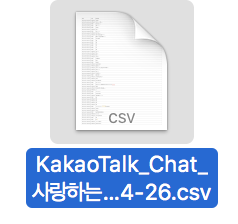
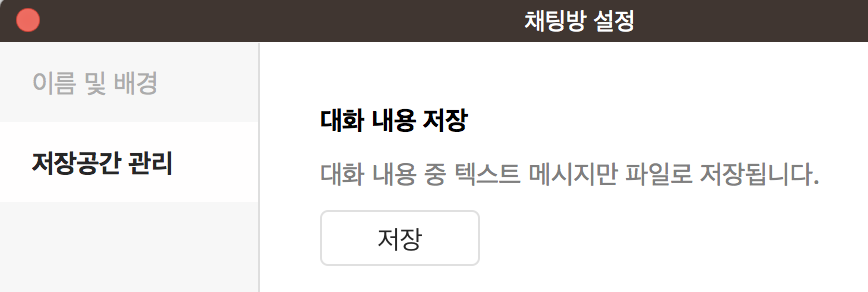

## 1. 대화내용 정제하기

In [1]:
import pandas as pd #csv파일 형태이므로 pandas를 이용하여 불러온다. 

In [4]:
#카카오톡 데이터를 불러와서 내용을 확인한다. 
data = pd.read_csv("/Users/jeonghyeonjeong/Downloads/단톡방hjkmsw.csv")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 3 columns):
Date       286 non-null object
User       286 non-null object
Message    286 non-null object
dtypes: object(3)
memory usage: 6.8+ KB
None
                  Date User                                            Message
0  2018-12-17 13:37:07  kkk                               kkk invited sss and.
1  2018-12-17 13:37:07  kkk                                        삭제된 메시지입니다.
2  2018-12-17 13:38:06  kkk  4시~6시반 현정 서우만나서놈 6시반~9시 현정 출근, \n경민 스터디 끝나구 합류...
3  2018-12-17 13:38:31  sss                                              20일??
4  2018-12-17 13:38:37  kkk                                                넵!!


In [5]:
#메세지만 따로 불러온다. 
corpus = data["Message"]
corpus.head

<bound method NDFrame.head of 0                                   kkk invited sss and.
1                                            삭제된 메시지입니다.
2      4시~6시반 현정 서우만나서놈 6시반~9시 현정 출근, \n경민 스터디 끝나구 합류...
3                                                  20일??
4                                                    넵!!
                             ...                        
281                                        오 이거 안갔나봐ㅠㅠㅠㅠ
282                                     웅웅 본인이 가고싶은곳으로!!
283                                               앗 괜춘괜춘
284                                                고마우~~
285                                                 이모티콘
Name: Message, Length: 286, dtype: object>

#### 데이터 전처리

In [7]:
#데이터 전처리를 위한 전체 데이터의 특징을 빈도분석으로 파악해본다.
import nltk

In [10]:
#corpus에 있는 msg(message) 하나하나 스트링으로 받아와서(str(msg)) 토큰으로 잘라야 한다. (token in str(msg).split()
total_tokens = [token for msg in corpus for token in str(msg).split()] #이렇게 만들어진 토큰을 리스트로 저장[]
print(len(total_tokens))

708


In [11]:
text = nltk.Text(total_tokens, name = 'kakao')
print(len(set(text.tokens))) #유니크 한 토큰 개수 : 555
print(text.vocab().most_common(10)) 

555
[('이모티콘', 22), ('사진', 19), ('나', 10), ('오', 8), ('그럼', 8), ('난', 7), ('저', 5), ('더', 5), ('ㅋㅋㅋㅋ', 5), ('나는', 4)]


#### 중요한 내용 정제
내가 정한 정제 기준
1. 사진, 이모티콘은 텍스트가 아니라서 제거
2. 자음/모음 표현 처리 방법. 
    예를 들어, 'oo', 'ㅠㅠ', 등 -> 이런 표현들도 전부 감정 표현의 의성어로 쓰거나 단축 표현이므로 제거하지 않음. 
3. http://로 시작하는 링크보낸 것들 제거
4. 특수문자 제거

In [29]:
import re

def message_cleaning(docs) : 
    # pandasSeries를 str로 바꿔야 하니까 정제 가능 
    docs = [str(doc) for doc in corpus]
    
    #1. 사진, 이모티콘은 텍스트가 아니라서 제거
    #compile을 써저 지움
    pattern1 = re.compile("사진|이모티콘")
    docs = [pattern1.sub(" ", doc) for doc in docs]#sub : compile된 것을 찾아서 뭐로 바꿔 줄 건지 ""로 바꿔준다. 
    
    #2. 는 제거하지 않으니까 pass 
    #제거 하고싶으면 pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    
    #3. http://로 시작하는 링크보낸 것들 제거
    #구글에 '하이퍼링크 제거하기' 검색하면, 
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    #4. 특수문자 제거
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]
    
    return docs

In [30]:
def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW


In [31]:
def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]


In [32]:
SW = define_stopwords("/Users/jeonghyeonjeong/for github/머신러닝_데이터분석A-Z_패스트캠퍼스/텍스트마이닝을 활용한 카카오톡 감성분석/data/stopwords-ko.txt")
#카카오톡 텍스트를 정제
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

286
['kkk invited sss and', '삭제된 메시지입니다', '4시6시반 현정 서우만나서놈 6시반9시 현정 출근 \n경민 스터디 끝나구 합류\n 9시11시반 에반스경민이는 시간되면 가궇ㅎ', '20일', '넵', '오 좋다좋다ㅋㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋㅋ헤헤 조하조하', '난 에반스그날가기로했으니께', '갱민이도 시간되면 같이가아', '완전좋아']


In [34]:
#정제되어 지워진 텍스트들 (" ")을 확인하고 지워준다. 
cleaned_text = pd.Series(cleaned_corpus)
data["Message"] = cleaned_text
cleaned_data = data[data["Message"] != " "] #빈 string(" ")인 경우를 제외하고 
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 284
Data columns (total 3 columns):
Date       249 non-null object
User       249 non-null object
Message    249 non-null object
dtypes: object(3)
memory usage: 7.8+ KB


In [35]:
#결과를 확인
cleaned_data.head()

,Date,User,Message
0,2018-12-17 13:37:07,kkk,kkk invited sss and
1,2018-12-17 13:37:07,kkk,삭제된 메시지입니다
2,2018-12-17 13:38:06,kkk,4시6시반 현정 서우만나서놈 6시반9시 현정 출근 \n경민 스터디 끝나구 합류\n ...
3,2018-12-17 13:38:31,sss,20일
4,2018-12-17 13:38:37,kkk,넵


In [36]:
#정제한 카카오톡 데이터를 저장
import pickle

with open("cleaned_data.pk", "wb") as f:
    pickle.dump(cleaned_data, f) #pickle파일로 저장